**importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**reading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data colab/deep_learning/ANN/Breast_cancer_ann.csv')
data.head()
del data['Unnamed: 32']

**Processing Data**

In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [7]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
print('shape of X', X.shape)
print('shape of  y',y.shape)

shape of X (569, 30)
shape of  y (569,)


In [9]:
# Encoding Categorical Values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print('shape of X_train', X_train.shape)
print('shape of X_test', X_test.shape)
print('shape of y_train', y_train.shape)
print('shape of y_tesy', y_test.shape)

shape of X_train (455, 30)
shape of X_test (114, 30)
shape of y_train (455,)
shape of y_tesy (114,)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Now that we have prepared data, we will import Keras and its packages**

**Artificial Neural Network **

In [13]:
import keras
from keras.models import Sequential
from keras.layers import  Dense, Dropout

In [14]:
# Initialising the ANN
classifier =  Sequential()

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 16, activation='relu', kernel_initializer='uniform', input_dim=30))

In [16]:
# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer='uniform', activation='relu'))

In [17]:
# # Adding the third hidden layer
# classifier.add(Dense(units = 16, kernel_initializer='uniform', activation='relu'))
# classifier.add(Dropout(0.1))

In [18]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer='uniform', activation='sigmoid'))

In [19]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [21]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.7859
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.7044
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.7382
Epoch 4/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.7977
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.8948
Epoch 6/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.9216
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.9272
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.9322
Epoch 9/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6076 - accuracy: 0.9403
Epoch 10/150
5/5 [==============================] - 0s 3ms/step - loss: 0.5758 - accuracy: 0.9463
Epoch 11/150
5/5 [===========

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  1],
       [ 3, 44]])

In [25]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 192.98245614035088%


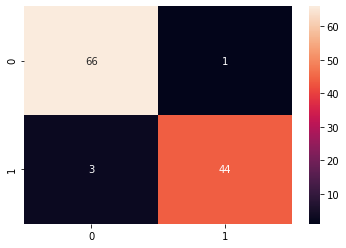

In [26]:
sns.heatmap(cm,annot=True)
# plt.savefig('h.png')